### [The Kaggle Competition Page for downloading the Dataset](https://www.kaggle.com/gilsousa/habermans-survival-data-set)

#### Now I have already downloaded the Haberman Dataset to my local Machine from [Kaggle](https://www.kaggle.com/gilsousa/habermans-survival-data-set). And so I will be loading this Data from my local drive in below.


## Description of the Data

The Haberman's survival dataset covers cases from a study by University of Chicago's Billings Hospital done between 1958 and 1970 on the subject of patients-survival who had undergone surgery for breast cancer.

Label/Attribute Information:

- Age of the patient at time of operation - numerical
- Year of operation (based on 1900, numerical)
- Number of positive axillary nodes detected - See note below on this (numerical)
- Survival status (this is a class attribute) where 1 means - patient survived 5 years or longer and 2 means patient died within 5 years

### A note on axillary lymph nodes and its relation with breast cancer diagnosis ?

[Source](https://www.medicalnewstoday.com/articles/319713)

The lymphatic system is one of the body’s primary tools for fighting infection. This system contains lymph fluid and lymph nodes, which occur in critical areas in the body. Cancer cells sometimes enter and build up in the lymph system.

Lymph nodes are responsible for filtering lymph fluid and detecting chemical changes that signal an infection is present. When these filter points are in the armpit, doctors call them axillary lymph nodes.

As axillary lymph nodes are near the breasts, they are often the first location to which breast cancer spreads if it moves beyond the breast tissue.

The number of axillary lymph nodes can vary from person to person, ranging from five nodes to more than 30.

After a breast cancer diagnosis, a doctor will often check whether cancer cells have spread to the axillary lymph nodes. This can help confirm the diagnosis and staging of the cancer. Breast cancer can spread to any lymph nodes. Most often, it spreads to the axillary lymph nodes first (in the armpit), and then to the nodes in the collarbone (clavicular) or the breast (internal mammary).


In [ ]:
# In Kaggle Needed to upgrade seaborn to version 11. Else, getting error, module 'seaborn' has no attribute 'histplot'
# First verify version with print(sns.__version__). If its 10 or less, upgrade to 11
# Then restart session from the top right corner in Kaggle,
# Because, if I have already imported seaborn then I will be stuck with the version I imported until I restart session
# !pip install --upgrade pip
# !pip install seaborn --upgrade

import pandas as pd
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [ ]:
# https://drive.google.com/file/d/1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2/view

original_df = pd.read_csv('../input/haberman.csv', names=['age', 'year', 'nodes', 'status'])
# original_df = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/Haberman/haberman.csv', names=['age', 'year', 'nodes', 'status'] )
original_df.head()

In [30]:
original_df.shape


(306, 4)

In [31]:
original_df['status'].value_counts()
original_df.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [32]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### Panda Profiling
Quickly do an exploratory data analysis with Pandas profiling module. It also generates interactive reports in web format with the basics of analysis.

In [33]:
pandas_profiling.ProfileReport(original_df)

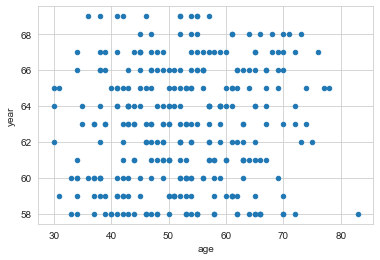

In [34]:
original_df.plot(kind='scatter', x='age', y='year')
plt.show()

The above scatter plot did not give much sensible data, hence do it slightly differently and along with using seaborn between 'age' and 'Axillary nodes'

### Note on searbon FacetGrid

From its [documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

It can also represent levels of a third variable with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe(). Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend.


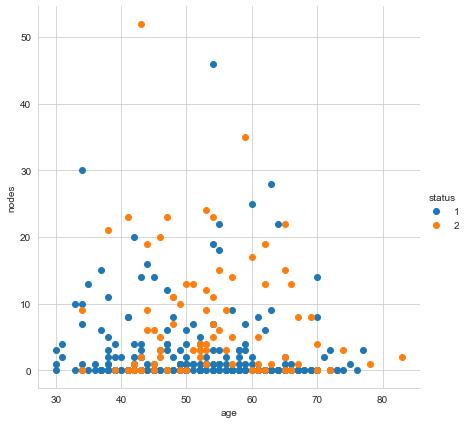

In [35]:
plt.close()
sns.set_style('whitegrid')
sns.FacetGrid(original_df, hue='status', height=6).map(plt.scatter, 'age', 'nodes').add_legend()
plt.show()

### Observation from above scatter plot -

From above plot, the overlapping 1 and 2 between 'age' and 'nodes' makes the classification between these features not feasible.


## Pair-Plot for getting spot estimates of variable interdependence

In our dataset the target column 'status' itself is numeric. It would hence be included in the pairgrid as a column/row. This is undesired as only the independent variables should be included in the pair-plot. To select ONLY the desired variables that shall be included in the grid, use the pairplot's vars keyword.

We can do this either by specifying the exact values the 'vars' will take by passing it a list of values or could use the below line to remove the last column

`vars=original_df.columns[:-1]`

### For the number of PairPlots
- Here we we will have "Number of Combinations of 3 separate things taken 2 at a time" i.e.  C(3, 2) = 3. As we have 3 features and out of which we select only 2 for a single plot. Therefore the answer is 3. That is, 3!(2!(3−2)!)

- **And we dont consider the graphs below the diagonal as the ones below the diagonal is the same graphs with a reversal of axes which won’t affect our observation. So we will only analyze graphs above the diagonal**

**Drawbacks of Pair Plots** Only useful when the number of features are not too high.  With large no of features, it becomes impossible to use Pair Plots for classification in an efficient manner. In those situations, other mathematical tools like PCA and t-SNE for dimensionality reduction may be of help.

In [36]:

# plt.close()
# sns.set_style('whitegrid')
# sns.pairplot(original_df, hue='status', height=6, vars=['age', 'year', 'nodes'])
# plt.show()

Now as we can see the plot coloring is not good, and the reason is that the target variable (which takes numerical values of 1 and 2 ) are not ideal in this case. It should be a 'categorical' column and should take 'yes' and 'no' as its values (for 1 and 2 respectively).

modify the target column values, so it makes sense and also convert the dtype of them to be categorical



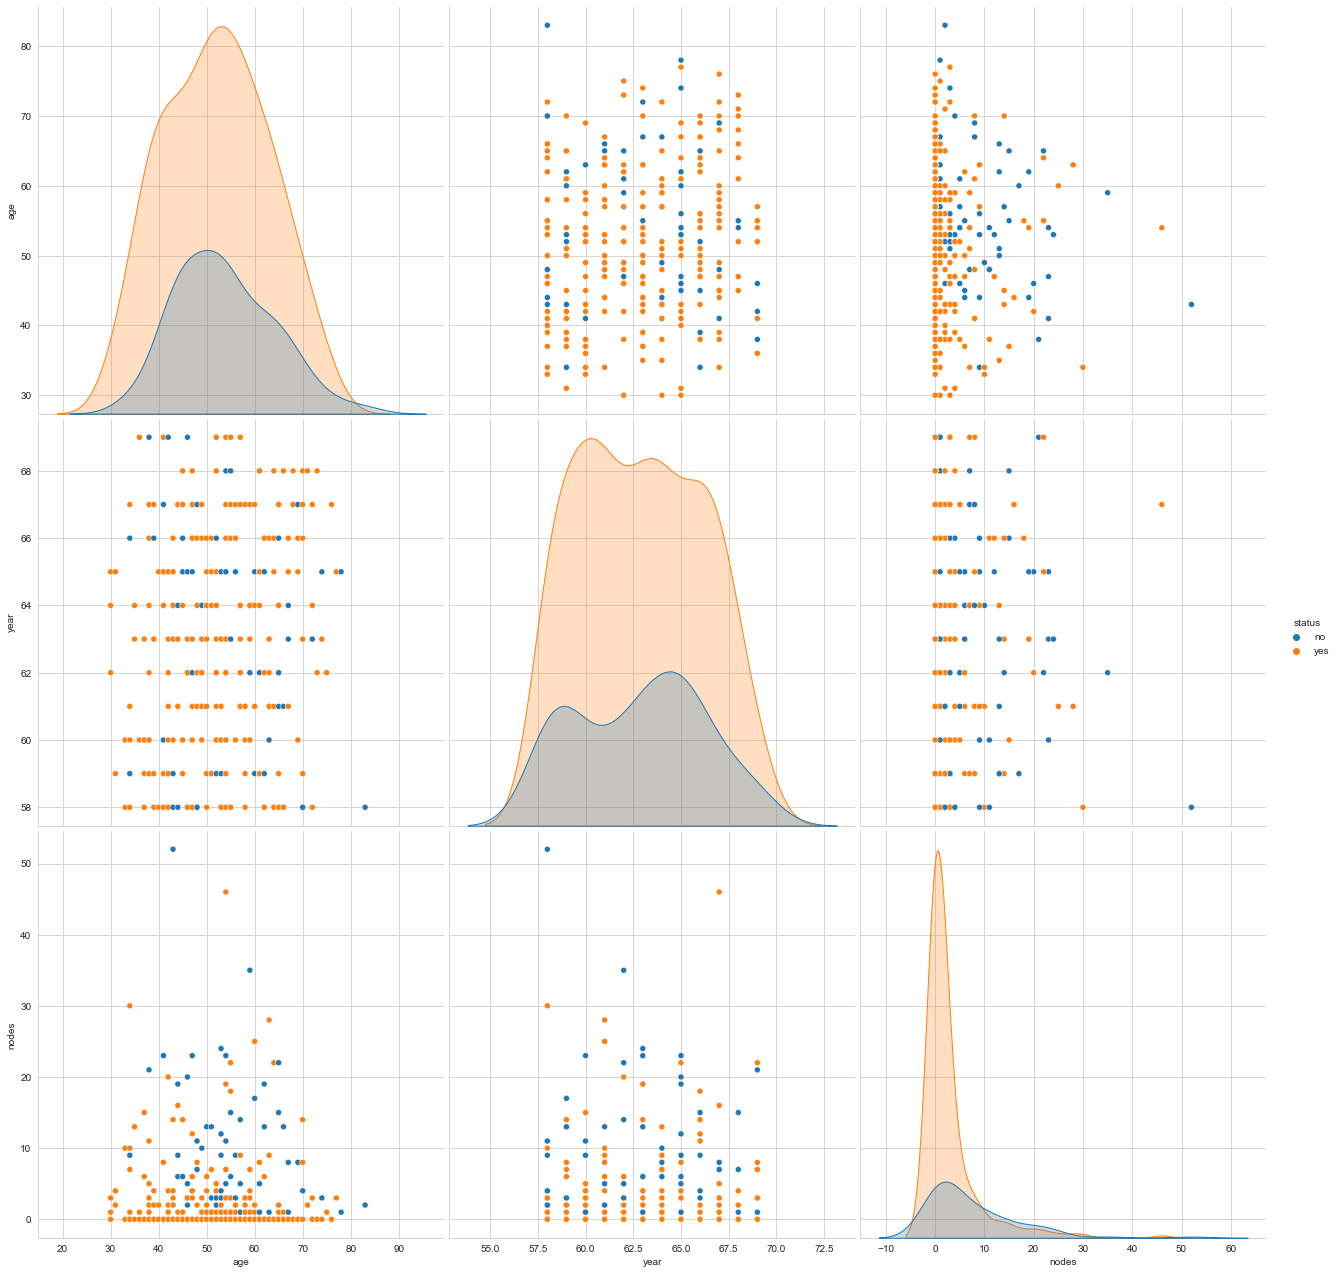

In [37]:
original_df['status'] = original_df['status'].map({1:"yes", 2:"no"})
original_df['status'] = original_df['status'].astype('category')

plt.close()
sns.set_style('whitegrid')
sns.pairplot(original_df, hue='status', height=6, vars=['age', 'year', 'nodes'])
plt.show()

### Observation from the above Pair Plot


**Age vs Year of Operation**- Highly overlapping and thus not useful for making any classification decision.

**Year when Operation was conducted vs Number of Axillary Nodes** - Again, highly overlapping and thus not useful for classification analysis.

**Age vs Number of Axillary Nodes** - Still quite Overlapping but better than the above two cases. So we may select these 2 features for univariate analysis.

Conclusion- The age of the patient and the Number of Axillary Nodes are the best features to predict the chances of survival.

## Uni-Variate analysis using histograms, PDF and CDF

- Distribution plots are useful for visually assessing frequencies of data points distribution.

- Typically the data points are grouped into buckets and the height of the bars representing each group increases with increase in the number of data points lie within that group. (histogram)

- Probability Density Function (PDF) is the probability that the variable takes a value x. (smoothed version of the histogram)

In [38]:
# First splitting the original dataframe into two containing 'yes' and 'no' for the survival_status
survival_status_yes = original_df[original_df.status == 'yes']
survival_status_no = original_df[original_df.status == 'no']

survival_status_yes.head()

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [39]:
survival_status_no.head()

,age,year,nodes,status
7,34,59,0,no
8,34,66,9,no
24,38,69,21,no
34,39,66,0,no
43,41,60,23,no


---

## A Note on Probability Density Function

The probability distribution of a continuous random variable, known as probability distribution functions, are the functions that take on continuous values. The probability of observing any single value is equal to 0 since the number of values which may be assumed by the random variable is infinite. For example, a random variable X may take all values over an interval of real numbers. Then the probability that X is in the set of outcomes A,P(A), is defined to be the area above A and under a curve. The curve, which represents a function p(x), must satisfy the following:

1: The curve has no negative values (p(x)>0 for all x)

2: The total area under the curve is equal to 1.

A curve meeting these requirements is often known as a density curve. Some examples of continuous probability distributions are normal distribution, exponential distribution, beta distribution, etc.

There’s another type of distribution that often pops up in literature which you should know about called cumulative distribution function. All random variables (discrete and continuous) have a cumulative distribution function. It is a function giving the probability that the random variable X is less than or equal to x, for every value x. For a discrete random variable, the cumulative distribution function is found by summing up the probabilities.

Unless you are implementing these functions yourself, all these functions are available in `scipy.stats.norm`

e.g. for cdf, then use this code:

```python
from scipy.stats import norm
print(norm.cdf(x, mean, std))
```

The area under a curve `y = f(x)` from `x = a` to `x = b` is the same as the integral of `f(x)dx` from `x = a` to `x = b`. [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) has a quick easy way to do integrals. And the probability of finding a single point in that area cannot be one because the idea is that the total area under the curve is one (unless MAYBE it's a delta function). So you should get `0 ≤ probability of value < 1` for any particular value of interest. There may be different ways of doing it, but a conventional way is to assign confidence intervals along the x-axis, like this

![](https://i.imgur.com/nZGpKyO.jpg).

---

## Univariate Analysis:(Histogram, PDF, CDF)

### Histogram
A histogram consists of adjacent rectangles erected on the x axis, split into discrete intervals called bins, and with an area proportional to the frequency of the occurrences for that bin. It counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. In our case, the bins will be the three features, 'age', 'nodes', 'year'

A [density plot](http://serialmentor.com/dataviz/histograms-density-plots.html) is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as Kernel Density Estimate. It is used for visualizing the Probability Density of a continuous variable.

**[Kernel density estimation](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde)** -> KDE represents the data using a continuous probability density curve in one or more dimensions. A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

To make density plots in seaborn, we can use `histplot` function because it lets us make multiple distributions with one function call. For example, we can make a density plot showing showing the count of the three features variables, on top of the corresponding histogram.

In below with (kde=True) adding a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution

The curve shows the density plot, on top of the histogram, and the density plot is essentially a smoothed version of the histogram. The y-axis represents the density, and the histogram is normalized by default so that it has the same y-scale as the density plot.

First I will do simple Histogram between 'status' and 'age'

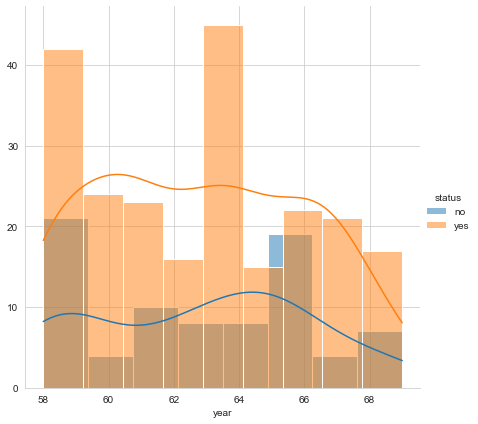

In [40]:
sns.FacetGrid(original_df, hue='status', height=6) \
    .map(sns.histplot, 'year', kde=True) \
    .add_legend()

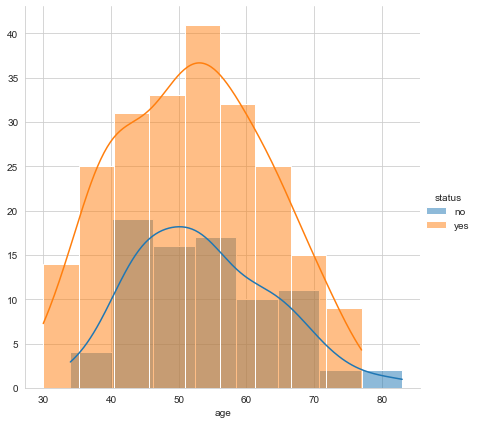

In [41]:
sns.FacetGrid(original_df, hue='status', height=6) \
    .map(sns.histplot, 'age', kde=True) \
    .add_legend()

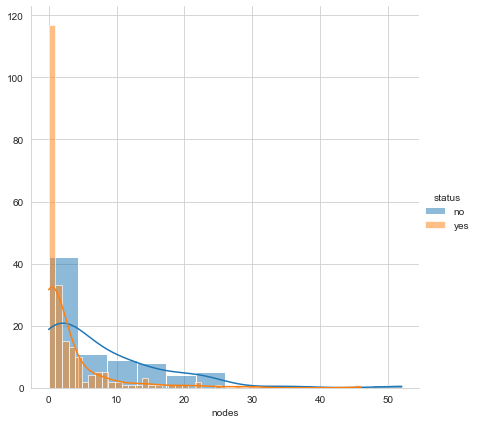

In [42]:
sns.FacetGrid(original_df, hue='status', height=6) \
    .map(sns.histplot, 'nodes', kde=True) \
    .add_legend()

In [43]:
# And below I am doing for all the three variables
# Keeping them commented out for now
# for df in [survival_status_yes]:
#     for column in original_df.columns[:-1]:
#         sns.FacetGrid(df, hue='status', height=6).map(sns.histplot, column, kde=True).add_legend()
#         plt.show()

---

### Observation looking at the Histogram and PDF above

- From the above there figures, the PDF of survival status based on age is highly overlapping. Meaning, between ages 40 and 65 years, the percentage survived patients and the percentage of Not-Survived is almost same - thus this feature is not suitable for classification.

- Same goes for survival status on the basis of the year of operation - its highly overlapping. So, using this datapoint we cannot predict anything

- 'axillary nodes' is the most clearly discernible. Generally we can say, that people survive long if they have less axillary nodes detected and vice versa but still this datapoint as well not hugely beneficial to classify.

---

## CDF (Cumulative Distribution Function) along with PDF

CDF will give us the cumulative plot of PDF so that you can calculate the exact percentage of patient survival status.

(Note, earlier I plotted and calculated the PDF's with seaborn, now I will be using numpy's `histogram` function )

### A note on `numpy.histogram()` function

The function returns two values `hist` which gives the array of values of the histogram, and `edge_bin` which is an array of float datatype containing the bin edges having length one more than the hist.

A bin is range that represents the width of a single bar of the histogram along the X-axis. You could also call this the interval. (Wikipedia defines them more formally as "disjoint categories".)

The Numpy `histogram` function doesn't draw the histogram, but it computes the occurrences of input data that fall within each bin, which in turns determines the area (not necessarily the height if the bins aren't of equal width) of each bar.

In this example:

     np.histogram([1, 2, 1], bins=[0, 1, 2, 3])

There are 3 bins, for values ranging from 0 to 1 (excl 1.), 1 to 2 (excl. 2) and 2 to 3 (incl. 3), respectively. The way Numpy defines these bins if by giving a list of delimiters (`[0, 1, 2, 3]`) in this example, although it also returns the bins in the results, since it can choose them automatically from the input, if none are specified. If `bins=5`, for example, it will use 5 bins of equal width spread between the minimum input value and the maximum input value.

The input values are 1, 2 and 1. Therefore, bin "1 to 2" contains two occurrences (the two `1` values), and bin "2 to 3" contains one occurrence (the `2`). These results are in the first item in the returned tuple: `array([0, 2, 1])`.

Since the bins here are of equal width, you can use the number of occurrences for the height of each bar. When drawn, you would have:

  * a bar of height 0 for range/bin [0,1] on the X-axis,
  * a bar of height 2 for range/bin [1,2],
  * a bar of height 1 for range/bin [2,3].

Implementing numpy.histogram while reading an image

`histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))`

As stated above, the parameter bins determines the histogram size, or the number of “bins” to use for the histogram. We pass in 256 because we want to see the pixel count for each of the 256 possible values in the grayscale image.

bin_edges  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


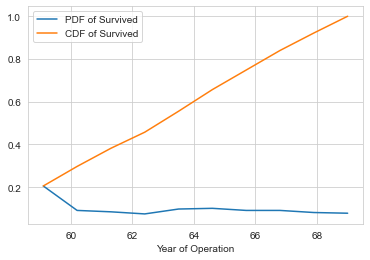

In [44]:
counts, bin_edges = np.histogram(original_df['year'], bins=10, density=True)
pdf = counts/sum(counts)
print('bin_edges ', bin_edges)
# bin_edges  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
print('pdf ', pdf)
# pdf  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719 0.09150327 0.09150327 0.08169935 0.07843137]
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF of Survived', 'CDF of Survived'])
plt.xlabel('Year of Operation')
plt.show()


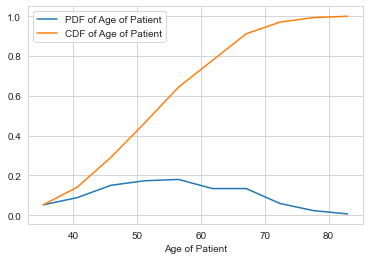

In [45]:
counts, bin_edges = np.histogram(original_df['age'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF of Age of Patient', 'CDF of Age of Patient'])
plt.xlabel('Age of Patient')
plt.show()

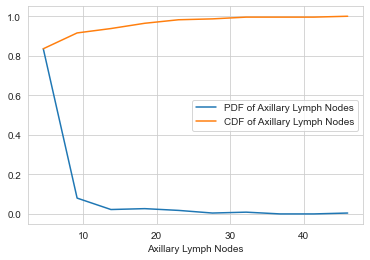

In [46]:
# Note, in below I am using `survival_status_yes` instead of `original_df`
# Because I want to get the CDF plot of only for survived people
counts, bin_edges = np.histogram(survival_status_yes['nodes'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF of Axillary Lymph Nodes', 'CDF of Axillary Lymph Nodes'])
plt.xlabel('Axillary Lymph Nodes')
plt.show()

### Observation from CDF curve

From above CDF (orange line) we can say that there's around 85% chance of survival if number of axillary nodes detected are < 5. And we can see as number of axillary nodes increases survival chances also reduces (from the PDF plot).

Its observed that 80% — 85% of people have good chances of survival if they have less number of axillary nodes detected and as nodes increases the survival status decreases.

And that 100% of the people are likely not to survive if they have 40 or more axillary nodes as the survival plot touches 0 from 40 onwards completely.

## Box Plot and Whiskers

Box Plot depicts groups of numerical data through their quartiles ( using 25th, 50th and 75th percentiles ) and also shows the outlier in data set. These percentiles are also known as the lower quartile, median and upper quartile.

A box plot consist of 5 parameters.

- **median** (Q2/50th Percentile): the middle value of the dataset.

- **first quartile** (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

- **third quartile** (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

- **Inter Quartile Range** (IQR): 25th to the 75th percentile.

- **whiskers** (shown in blue)

- **outliers** (shown as green circles)

- **maximum**: Q3 + 1.5*IQR

- **minimum**: Q1 -1.5*IQR

![img](https://i.imgur.com/RNPBFo1.png)

![img](https://i.imgur.com/wcluTeo.png)

[Image Source](https://www.researchgate.net/figure/Identification-of-outliers-left-box-plot-and-the-normal-distribution-of-observation_fig4_309148334)

![img](https://i.imgur.com/4Df0ArH.jpg)

<AxesSubplot:xlabel='status', ylabel='nodes'>

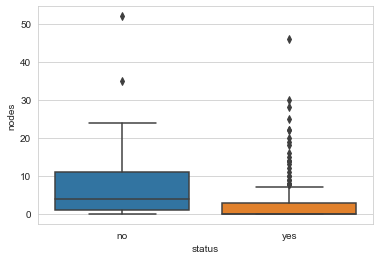

In [47]:
sns.boxplot(x='status', y='nodes', data=original_df)

Looking at the above box plot-

- The lower line is the 25th percentile.

- The middle line is at 50th (median) percentile.

- The upper line is 75th percentile.

- The height of the box is what is 25-th to 75th percentile and is called Inter Quantile Range.

- The extended vertical lines beyond the colored boxes are the Whiskers, whose length is 1.5 times the Inter Quartile Range.



<AxesSubplot:xlabel='status', ylabel='year'>

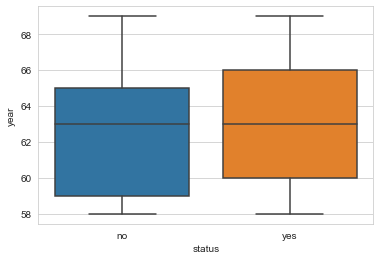

In [48]:
sns.boxplot(x='status', y='year', data=original_df)

<AxesSubplot:xlabel='status', ylabel='age'>

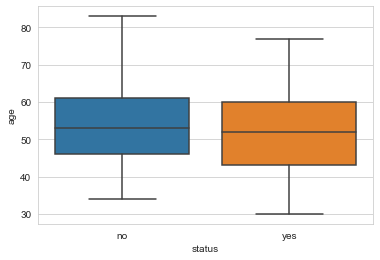

In [49]:
sns.boxplot(x='status', y='age', data=original_df)

## Observation from Box Plots

#### Below looking at the plot of survival_status vs nodes

- Patients with axillary_nodes less then 5, tends to survive.
- Around 80% of the patients have less than 11 axillary_nodes.
- Almost all who survived more than 5 years after surgery had maximum positive axillary nodes about 8 - as depicted by the upper bound of the Whiskers on the survival_status vs nodes plot.
- However, there are a lot of outlier data points related to the "nodes" feature. Specially in the segment where people survived.

#### Now, looking at the plot of survival_status vs age

- The 25th to 75th values for class 'Yes' lies between 43 to 60 of age & for class 'NO' its between 47 to 61 of age.

- Both classes (Yes and No status of survival ) distributions comparison over Age attribute seems both classes have mixed character. They have almost the same median and their 25th to 75th precentile range are also very closely matching. Hence, not helpful to distinguish the classes.

## Violin Plot

Violin Plot shows the combined data distribution of PDF and box plot. The curve denotes the PDF and middle area denotes box plot

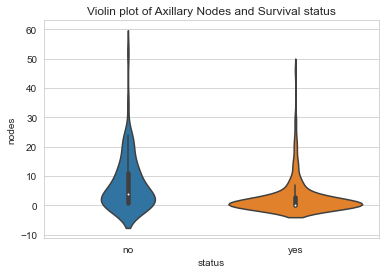

In [50]:
sns.violinplot(x='status', y='nodes', data=original_df, size=8)
plt.title('Violin plot of Axillary Nodes and Survival status')
plt.show()


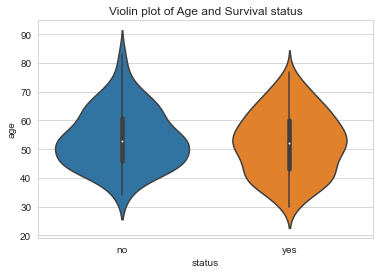

In [51]:
sns.violinplot(x='status', y='age', data=original_df, size=8)
plt.title('Violin plot of Age and Survival status')
plt.show()

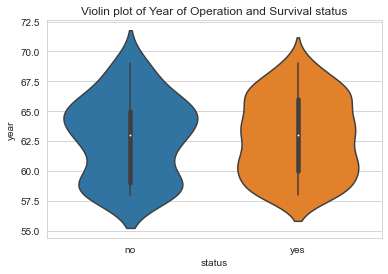

In [52]:
sns.violinplot(x='status', y='year', data=original_df, size=8)
plt.title('Violin plot of Year of Operation and Survival status')
plt.show()

## Observation from Violin Plot

- For the survive-status vs nodes plot, the survival-density is most around 0-7 nodes. More the number of nodes, lesser the survival chances.

- From the same plot, we also see that the largest percentage of patients who survived had 0 nodes. However on the other hand, a small percentage of patients who indeed had zero axillary nodes, still died within 5 years of operation. Hence absence of positive axillary nodes cannot always guarantee survival.

- For the survive-status vs age plot it is clear that the Age attribute is normally distributed. However given significant overlap, patient's age alone is not a deciding factor determining the survival of a patient.

- However both for age and year parameters there's a substantial overlap of data points, thus making it difficult to set a threshold to classify both classes of patients.

## Contour Plot (Multivariate probability density )

A quite common type of chart in the scientific world is the contour plot or contour map. This visualization is in fact suitable for displaying three-dimensional surfaces through a contour map composed of curves closed showing the points on the surface that are located at the same level, or that have the same z value.
A contour line or isoline of a function of two variables is a curve along which the function has a constant value. Contour is a cross-section of the three-dimensional graph.

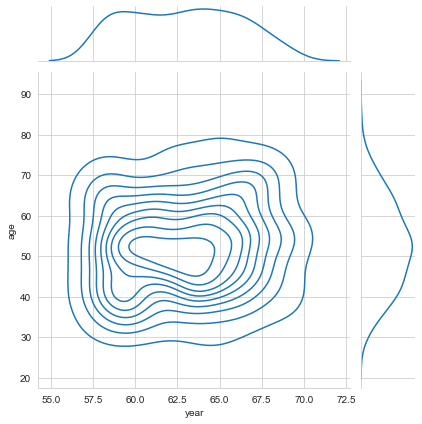

In [53]:
# This will be a 2D density plot
sns.jointplot(x='year', y='age', data=original_df, kind="kde" )
plt.show()

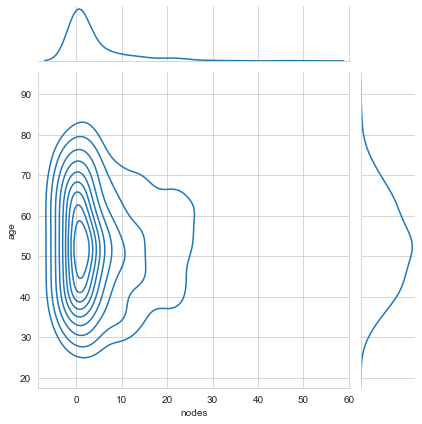

In [54]:
# This will be a 2D density plot
sns.jointplot(x='nodes', y='age', data=original_df, kind="kde" )
plt.show()



## Observation from Contour Plot

Between year 1960 and 1964, more number of operations were done on the patients in the age group 45 to 55.
